In [3]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

#the above imports the plotting library matplotlib

In [2]:
import h5py
import numpy as np

In [12]:
f = h5py.File('/mnt/data3/yamins/auditory/auditory_source_from_alex/cgs.raw')

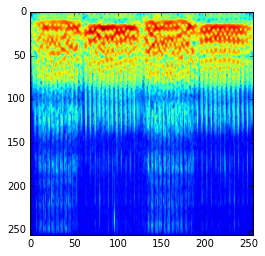

In [24]:
plt.imshow(f['data'][24].reshape((3, 256, 256))[0])

In [16]:
256 * 256 * 3

196608

In [116]:
cochleagrams = f['data'][:].reshape((165, 3, 256, 256))[:, 0, :, :]

In [70]:
cochs.d

dtype('uint8')

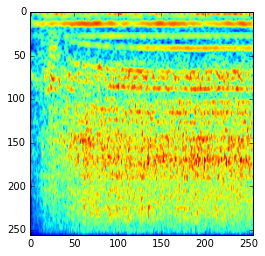

In [118]:
plt.imshow(cochleagrams[10])

In [50]:
stimmeta = np.load('/mnt/data3/yamins/auditory/auditory_source_from_alex/neural_stim_meta.npy')

In [54]:
stimmeta.dtype

dtype([('filename', 'S44'), ('id', '<i8'), ('embedded-wav-start-idx', '<i8'), ('embedded-wav-end-idx', '<i8'), ('cat_assignment', '<U10'), ('cat_assignment_idx', '<i8'), ('fmri_stim_num', '<i8'), ('fmri_stim_idx', '<i8')])

In [73]:
stimmeta['cat_assignment']

array([u'Mechanical', u'HumNonVoc', u'HumVoc', u'EngSpeech', u'EnvSound',
       u'Music', u'AniNonVoc', u'Mechanical', u'Music', u'HumNonVoc',
       u'Mechanical', u'Music', u'Music', u'EnvSound', u'EngSpeech',
       u'HumVoc', u'Mechanical', u'Mechanical', u'Mechanical',
       u'Mechanical', u'Mechanical', u'EnvSound', u'Mechanical', u'AniVoc',
       u'AniVoc', u'Mechanical', u'Music', u'EnvSound', u'EnvSound',
       u'EnvSound', u'Music', u'AniNonVoc', u'Mechanical', u'EnvSound',
       u'Mechanical', u'HumVoc', u'Song', u'AniNonVoc', u'HumVoc',
       u'EnvSound', u'HumVoc', u'Mechanical', u'Mechanical', u'Mechanical',
       u'EnvSound', u'AniVoc', u'AniNonVoc', u'AniVoc', u'Mechanical',
       u'EnvSound', u'Music', u'Music', u'AniVoc', u'Mechanical',
       u'HumNonVoc', u'EnvSound', u'AniNonVoc', u'EnvSound', u'AniVoc',
       u'EnvSound', u'HumVoc', u'AniVoc', u'EngSpeech', u'HumVoc',
       u'Music', u'Mechanical', u'EnvSound', u'Song', u'Mechanical',
       u'EnvSound',

In [36]:
f1 =  h5py.File('/mnt/data3/yamins/auditory/auditory_source_from_alex/net_7_tf.natsounds165.hdf5')

In [39]:
f2 =  h5py.File('/mnt/data3/yamins/auditory/auditory_source_from_alex/net_7_tf_untrained.natsounds165.hdf5')

In [40]:
f2.keys()

[u'conv1',
 u'conv2',
 u'conv3',
 u'conv4',
 u'conv5',
 u'fc6',
 u'fc_top',
 u'lrnorm1',
 u'lrnorm2',
 u'pool1',
 u'pool2',
 u'pool5']

In [38]:
f1['conv1']

<HDF5 dataset "conv1": shape (165, 86, 86, 96), type "<f4">

In [44]:
voxf = np.load('/mnt/data3/yamins/auditory/auditory_source_from_alex/voxel_features_array.npy')

In [55]:
voxf.shape

(165, 8782, 3)

In [92]:
nans = np.isnan(voxf)

In [48]:
voxfm = np.load('/mnt/data3/yamins/auditory/auditory_source_from_alex/voxel_features_meta.npy')

In [49]:
voxfm

array([(0, 'rh', 42, -67,   1251,  3.), (0, 'rh', 48, -65,   1347,  3.),
       (0, 'rh', 42, -63,   1437,  3.), ...,
       (9, 'lh', 55,  28, 293087,  3.), (9, 'lh', 45,  32, 293258,  3.),
       (9, 'lh', 45,  34, 293346,  3.)],
      dtype=[('subj_idx', '<i8'), ('hemi', 'S2'), ('x_ras', '<i2'), ('y_ras', '<i2'), ('voxel_id', '<i8'), ('n_reps', '<f8')])

In [79]:
np.unique(voxfm['voxel_id'])

array([  1251,   1347,   1437, ..., 293087, 293258, 293346])

In [93]:
n_reps = voxfm['n_reps']

In [96]:
reps3 = n_reps >= 3

In [101]:
#all the missing data is the same
all([(nans[0] == nans[i]).all() for i in range(1, 165)])

True

In [103]:
nans[0][:, :2].any()

False

In [109]:
nans0 = nans[0][:, 2]
nans0.sum()

1088

In [108]:
#ok the nans are exactly the ones w/o the 3rd rep
(nans0 == np.invert(reps3)).all()

True

In [56]:
import cPickle
voxfm1 = cPickle.load(open('/mnt/data3/yamins/auditory/auditory_source_from_alex/roi_masks.cpy'))

In [59]:
voxfm1['masks'].shape

(7694, 4)

In [61]:
voxfm1['masks'][0]

array([ 0.,  0.,  0.,  0.])

In [80]:
voxfm1['masks'].dtype

dtype('float64')

In [68]:
voxfm1['masks'].sum(1).argmax()

4052

In [69]:
voxfm1['masks'][4052]

array([ 1.,  1.,  1.,  0.])

In [81]:
voxfm1['mask_names']

['tonotopic', 'pitch', 'music', 'speech']

In [110]:
pwd

u'/home/yamins/psych253'

In [271]:
newF = h5py.File('/mnt/data3/yamins/auditory/auditory_cortex_dataset.hdf5', mode='a')

In [272]:
dset_cochs = newF.create_dataset('cochleagrams', dtype=cochleagrams.dtype, shape=cochleagrams.shape)

In [273]:
dset_cochs[:] = cochleagrams

In [274]:
dset_cochs[0]

array([[ 8, 17, 10, ..., 21, 20, 18],
       [ 8, 19, 15, ..., 22, 20, 17],
       [ 8, 21, 20, ..., 22, 19, 16],
       ..., 
       [ 4,  9, 14, ..., 14, 11,  9],
       [ 4,  8, 12, ..., 11,  8,  9],
       [ 3,  7,  9, ...,  8,  7,  7]], dtype=uint8)

In [275]:
cochleagrams[0]

array([[ 8, 17, 10, ..., 21, 20, 18],
       [ 8, 19, 15, ..., 22, 20, 17],
       [ 8, 21, 20, ..., 22, 19, 16],
       ..., 
       [ 4,  9, 14, ..., 14, 11,  9],
       [ 4,  8, 12, ..., 11,  8,  9],
       [ 3,  7,  9, ...,  8,  7,  7]], dtype=uint8)

In [276]:
dset_cochs

<HDF5 dataset "cochleagrams": shape (165, 256, 256), type "|u1">

In [277]:
dset_cochs.dims[0].label = 'sound'
dset_cochs.dims[1].label = 'frequency'
dset_cochs.dims[2].label = 'time'

In [278]:
dset_cochs.dims.keys()

[<"sound" dimension 0 of HDF5 dataset at 140001514125264>,
 <"frequency" dimension 1 of HDF5 dataset at 140001514125264>,
 <"time" dimension 2 of HDF5 dataset at 140001514125264>]

In [299]:
stimfield_name_map = [('filename', 'sound_filename'), 
                      ('cat_assignment', 'category')]

stimfields = stimmeta.dtype.fields
new_stimfields = []
for k, v in stimfield_name_map:
    print(k)
    dt = stimmeta[k].dtype
    if dt.name.startswith('unicode'):
        dt = stimmeta[k].astype(str).dtype
    dts = str(dt)
    new_stimfields.append((v, dt))

new_stimdtype = np.dtype(new_stimfields)


filename
cat_assignment


In [300]:
dset_stimmeta = newF.create_dataset('stimulus_meta', dtype=new_stimdtype, shape=stimmeta.shape)
for k, v in stimfield_name_map:
    print('creating', k, v)
    dset_stimmeta[v] = stimmeta[k]
dset_stimmeta.dims[0].label = 'sound'

('creating', 'filename', 'sound_filename')
('creating', 'cat_assignment', 'category')


In [301]:
dset_voxel_responses = newF.create_dataset('voxel_responses', dtype=voxf.dtype, shape=voxf.shape)
dset_voxel_responses[:] = voxf
dset_voxel_responses.dims[0].label = 'sound'
dset_voxel_responses.dims[1].label = 'voxel'
dset_voxel_responses.dims[2].label = 'trial'

In [302]:
dset_voxel_responses

<HDF5 dataset "voxel_responses": shape (165, 8782, 3), type "<f8">

In [303]:
dset_voxel_responses.dims.keys()

[<"sound" dimension 0 of HDF5 dataset at 140001514125744>,
 <"voxel" dimension 1 of HDF5 dataset at 140001514125744>,
 <"trial" dimension 2 of HDF5 dataset at 140001514125744>]

In [304]:
field_name_map = [('subj_idx', 'subject_idx'), 
 ('hemi', 'hemisphere'),
 ('x_ras', 'x_raster'),
 ('y_ras', 'y_raster'),
 ('n_reps', 'number_of_trials')]

In [305]:
fields = voxfm.dtype.fields
new_fields = []
for k, v in field_name_map:
    print(k)
    new_fields.append((v, str(fields[k][0])))

new_fields.extend([(k, str(voxfm1['masks'].dtype)) for k in voxfm1['mask_names']])
new_dtype = np.dtype(new_fields)    


subj_idx
hemi
x_ras
y_ras
n_reps


In [306]:
dset_voxel_meta = newF.create_dataset('voxel_meta', dtype=new_dtype, shape=voxfm.shape)
for k, v in field_name_map:
    print('creating', k, v)
    dset_voxel_meta[v] = voxfm[k]
    
for (ind, k) in enumerate(voxfm1['mask_names']):
    arr0 = voxfm1['masks'][:, ind]
    arr = np.zeros(shape=voxfm.shape, dtype=voxfm1['masks'].dtype)
    arr[reps3] = arr0
    dset_voxel_meta[k] = arr

dset_voxel_meta.dims[0].label = 'voxel'

('creating', 'subj_idx', 'subject_idx')
('creating', 'hemi', 'hemisphere')
('creating', 'x_ras', 'x_raster')
('creating', 'y_ras', 'y_raster')
('creating', 'n_reps', 'number_of_trials')


In [309]:
voxf_mean = voxf.mean(2)

In [311]:
dset_voxel_mean = newF.create_dataset('trial_averaged_voxel_responses', dtype=voxf_mean.dtype, shape=voxf_mean.shape)
dset_voxel_mean[:] = voxf_mean

In [312]:
dset_voxel_mean.dims[0].label = 'sound'

In [319]:
f1['conv5_G']

<HDF5 dataset "conv5_G": shape (165, 11, 11, 512), type "<f4">

In [320]:
grp_untrained = newF.create_group('untrained_network_features')
for k in f2.keys():
    f2.copy(k, grp_untrained)

In [328]:
for k in f2.keys():
    grp_untrained[k].dims[0].label = 'sound'
    
    if len(grp_untrained[k].dims.keys()) > 2:
        grp_untrained[k].dims[1].label = 'frequency'
        grp_untrained[k].dims[2].label = 'time'
        grp_untrained[k].dims[3].label = 'channel'
    else:
        grp_untrained[k].dims[1].label = 'channel'

In [329]:
grp_untrained['fc6'].dims.keys()

[<"sound" dimension 0 of HDF5 dataset at 140001514279632>,
 <"channel" dimension 1 of HDF5 dataset at 140001514279632>]

In [330]:
grp_trained = newF.create_group('trained_network_features')
for k in f1.keys():
    f1.copy(k, grp_trained)
    
for k in f1.keys():
    grp_trained[k].dims[0].label = 'sound'
    
    if len(grp_trained[k].dims.keys()) > 2:
        grp_trained[k].dims[1].label = 'frequency'
        grp_trained[k].dims[2].label = 'time'
        grp_trained[k].dims[3].label = 'channel'
    else:
        grp_trained[k].dims[1].label = 'channel'


In [333]:
grp_trained['conv5_G']

<HDF5 dataset "conv5_G": shape (165, 11, 11, 512), type "<f4">

In [338]:
newF.close()